## Digit Recognizer
https://www.kaggle.com/c/digit-recognizer

In [44]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Загружаем исходные данные

In [45]:
train = np.loadtxt('./data/digit/train.csv', delimiter=',', skiprows=1)
test = np.loadtxt('./data/digit/test.csv', delimiter=',', skiprows=1)

In [47]:
train_img.shape

(42000, 28, 28)

In [48]:
# сохраняем разметку в отдельную переменную
train_label = train[:, 0]
# приводим размерность к удобному для обаботки виду
train_img = np.resize(train[:, 1:], (train.shape[0], 28, 28))
test_img = np.resize(test, (test.shape[0], 28, 28))

In [49]:
train_img.shape

(42000, 28, 28)

## Визуализируем исходные данные

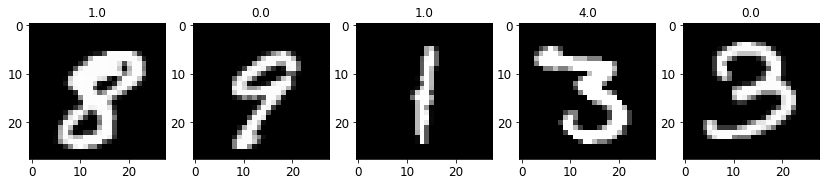

In [51]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_img[10:15], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);

## Вычисляем X и Y составляющие градиента с помощью оператора Собеля

In [52]:
train_sobel_x = np.zeros_like(train_img)
train_sobel_y = np.zeros_like(train_img)
for i in range(len(train_img)):
    train_sobel_x[i] = cv2.Sobel(train_img[i], cv2.CV_64F, dx=1, dy=0, ksize=3)
    train_sobel_y[i] = cv2.Sobel(train_img[i], cv2.CV_64F, dx=0, dy=1, ksize=3)

In [53]:
test_sobel_x = np.zeros_like(test_img)
test_sobel_y = np.zeros_like(test_img)
for i in range(len(test_img)):
    test_sobel_x[i] = cv2.Sobel(test_img[i], cv2.CV_64F, dx=1, dy=0, ksize=3)
    test_sobel_y[i] = cv2.Sobel(test_img[i], cv2.CV_64F, dx=0, dy=1, ksize=3)

## Вычисляем угол и длину вектора градиента

In [54]:
train_g, train_theta = cv2.cartToPolar(train_sobel_x, train_sobel_y)

In [55]:
test_g, test_theta = cv2.cartToPolar(test_sobel_x, test_sobel_y)

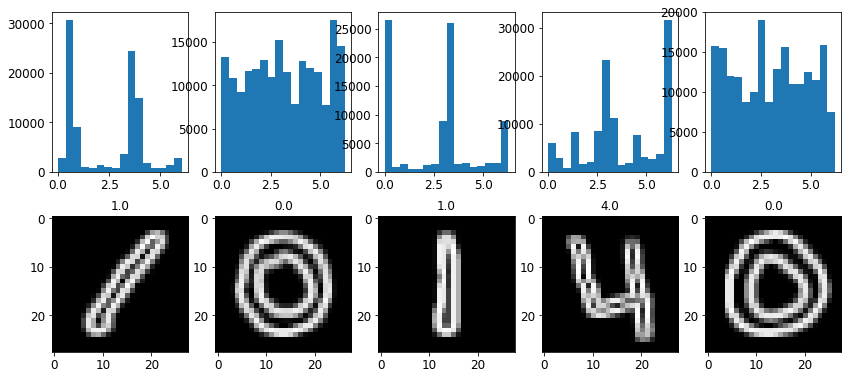

In [56]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_g[:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);
    subplot = fig.add_subplot(3, 7, i)
    plt.hist(train_theta[i - 1].flatten(),
             bins=16, weights=train_g[i - 1].flatten())

## Вычисляем гистограммы градиентов

In [57]:
# Гистограммы вычисляются с учетом длины вектора градиента
train_hist = np.zeros((len(train_img), 16))
for i in range(len(train_img)):
    hist, borders = np.histogram(train_theta[i],
                                 bins=16,
                                 range=(0., 2. * np.pi),
                                 weights=train_g[i])
    train_hist[i] = hist

In [58]:
test_hist = np.zeros((len(test_img), 16))
for i in range(len(test_img)):
    hist, borders = np.histogram(test_theta[i],
                                 bins=16,
                                 range=(0., 2. * np.pi),
                                 weights=test_g[i])
    test_hist[i] = hist

## Нормируем вектор гистограммы

In [59]:
# По умолчанию используется L2 норма
train_hist = train_hist / np.linalg.norm(train_hist, axis=1)[:, None]

In [60]:
test_hist = test_hist / np.linalg.norm(test_hist, axis=1)[:, None]

## Разбиваем выборку на обучение и валидацию

In [97]:
from sklearn.model_selection import train_test_split
y_train, y_val, x_train, x_val = train_test_split(
    train_label, train_hist, test_size=0.2,
    random_state=42)

In [98]:
#Попробуем использовать метод KNN для обучения
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [99]:
#Обучаем модель на выборке для обучения. Попробуем подобрать значения n_neigbors от 2 до 15.
#Будем смотреть на accurancy для каждого значения n_neigbors
kmax=0
kmaxAccurancy=0
for k in range(2, 15, 1):
    knn = KNeighborsClassifier(n_neighbors=k).fit( x_train, y_train )
    y_knn_pred = knn.predict(x_train)
    y_knn_pred_test = knn.predict(x_val)
    print('K =', k)
    print('Accuracy train: %s' % accuracy_score(y_train, y_knn_pred))
    print('Accuracy test: %s' % accuracy_score(y_val, y_knn_pred_test))
    acc=accuracy_score(y_val, y_knn_pred_test)
    if acc>kmaxAccurancy:
        kmaxAccurancy=acc
        kmax=k

K = 2
Accuracy train: 0.7652678571428572
Accuracy test: 0.5148809523809523
K = 3
Accuracy train: 0.7427976190476191
Accuracy test: 0.5576190476190476
K = 4
Accuracy train: 0.7235416666666666
Accuracy test: 0.570595238095238
K = 5
Accuracy train: 0.7100297619047619
Accuracy test: 0.5813095238095238
K = 6
Accuracy train: 0.6994047619047619
Accuracy test: 0.5888095238095238
K = 7
Accuracy train: 0.6932440476190476
Accuracy test: 0.5947619047619047
K = 8
Accuracy train: 0.688422619047619
Accuracy test: 0.596547619047619
K = 9
Accuracy train: 0.683125
Accuracy test: 0.6030952380952381
K = 10
Accuracy train: 0.6780357142857143
Accuracy test: 0.6021428571428571
K = 11
Accuracy train: 0.6747619047619048
Accuracy test: 0.6038095238095238
K = 12
Accuracy train: 0.6707738095238095
Accuracy test: 0.6080952380952381
K = 13
Accuracy train: 0.6691071428571429
Accuracy test: 0.6110714285714286
K = 14
Accuracy train: 0.6666369047619047
Accuracy test: 0.6092857142857143


## Оцениваем качество решение на валидационной выборке

In [100]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_knn_pred_test))

             precision    recall  f1-score   support

        0.0       0.35      0.48      0.40       816
        1.0       0.94      0.95      0.95       909
        2.0       0.47      0.39      0.42       846
        3.0       0.61      0.68      0.64       937
        4.0       0.68      0.66      0.67       839
        5.0       0.62      0.61      0.62       702
        6.0       0.42      0.38      0.40       785
        7.0       0.87      0.71      0.78       893
        8.0       0.51      0.50      0.50       835
        9.0       0.66      0.67      0.66       838

avg / total       0.62      0.61      0.61      8400



In [101]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_val, pred_val))

[[102  24  82  30 106  18 221   7 179  47]
 [  0 692   2   0  44   1 139  17  13   1]
 [ 21   0 245 158  12 203  54  16 119  18]
 [ 14   0 113 456   3 235   7   2  98   9]
 [ 11 248   5   2 260   0 205  43  37  28]
 [  3   0  84  97   5 472   3   4  33   1]
 [ 53  26  66  11 116   4 355  13  76  65]
 [  4 113  38  16  66  41 189 368  15  43]
 [ 81   6  68  44  36  44 107   3 411  35]
 [ 11  73  31  20 149  11 222  30  65 226]]


## Предсказания на тестовыйх данных

In [106]:
#Делаем предсказание, для этого обучаемся на всех данных используя лучшее значение n_neighbors полученное на тестовой выборке
knn = KNeighborsClassifier(n_neighbors=kmax).fit( train_hist, train_label )
y_knn_pred_final = knn.predict(test_hist)

## Визуализируем предсказания

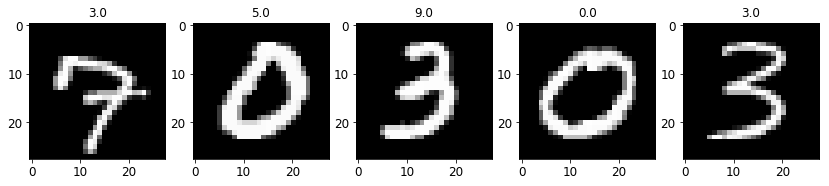

In [107]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(test_img[5:10], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % y_knn_pred_final[i - 1]);

In [112]:
#Преобразуем значения меток в int, так нужно для submit-а на kaggle
y_knn_pred_final = y_knn_pred_final.astype(int)

In [113]:
y_knn_pred_final

array([3, 5, 9, ..., 3, 9, 3])

## Готовим файл для отправки

In [114]:
with open('submit2.txt', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(y_knn_pred_final, 1):
        dst.write('%s,%s\n' % (i, p))

In [27]:
!head submit.txt

"head" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [270]:
# Your submission scored 0.41700